## Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
%pylab inline
import numpy as np
import pandas as pd
import statsmodels.stats.api as sm

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


## Reading the data from CSV

In [2]:
data_2016 = pd.read_csv('/Users/sonalichaudhari/Desktop/ADS_MidTerm/Data/New_Data/DataClean_2016.csv',low_memory=False)
data_2017 = pd.read_csv('/Users/sonalichaudhari/Desktop/ADS_MidTerm/Data/New_Data/DataClean_2017.csv',low_memory=False)

In [2]:
zillow_data= pd.read_csv('/Users/sonalichaudhari/Desktop/ADS_MidTerm/Data/New_Data/Clean_Combined.csv',low_memory=False)
del zillow_data['Unnamed: 0']

In [41]:
zillow_data.dtypes

age                             float64
assessmentyear                  float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fips                            float64
landtaxvaluedollarcnt           float64
latitude                        float64
logerror                        float64
longitude                       float64
lotsizesquarefeet               float64
month                             int64
parcelid                          int64
propertycountylandusecode         int64
propertylandusetypeid           float64
rawcensustractandblock          float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
structuretaxvaluedollarcnt      float64
taxamount                       float64
taxvaluedollarcnt               float64
transactiondate                   int64
year                              int64


## Cross Validation for splitting the data in train and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(zillow_data.ix[:, zillow_data.columns != 'logerror'], 
                                                    zillow_data['logerror'], 
                                                    test_size=0.30)

In [5]:
zillow_data.columns

Index(['age', 'assessmentyear', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'fips', 'landtaxvaluedollarcnt',
       'latitude', 'logerror', 'longitude', 'lotsizesquarefeet', 'month',
       'parcelid', 'propertycountylandusecode', 'propertylandusetypeid',
       'rawcensustractandblock', 'regionidcity', 'regionidcounty',
       'regionidzip', 'roomcnt', 'structuretaxvaluedollarcnt', 'taxamount',
       'taxvaluedollarcnt', 'transactiondate', 'year', 'yearbuilt'],
      dtype='object')

In [6]:
np.mean(y_train)

0.013928200420573177

In [7]:
np.sqrt(mean_squared_error([np.mean(y_train)]*len(y_train), y_train))

0.16448486095361445

# Random Forest

In [23]:
rf = RandomForestRegressor(n_estimators=300, min_samples_leaf=3)

In [ ]:
rf.fit(X_train, y_train)

In [40]:
np.sqrt(mean_squared_error(rf.predict(X_train), y_train))

0.11021418653181644

In [41]:
np.sqrt(mean_squared_error(rf.predict(X_test), y_test))

0.16744121382696847

In [12]:
y_train_predicted = rf.predict(X_train)
y_test_predicted = rf.predict(X_test)

In [13]:
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)

In [25]:
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)

In [27]:
rms_train

0.012195321178183385

In [28]:
rms_test

0.028178124884613506

In [14]:
mae_test

0.072796558643733328

In [21]:
mae_train

0.039774521154614995

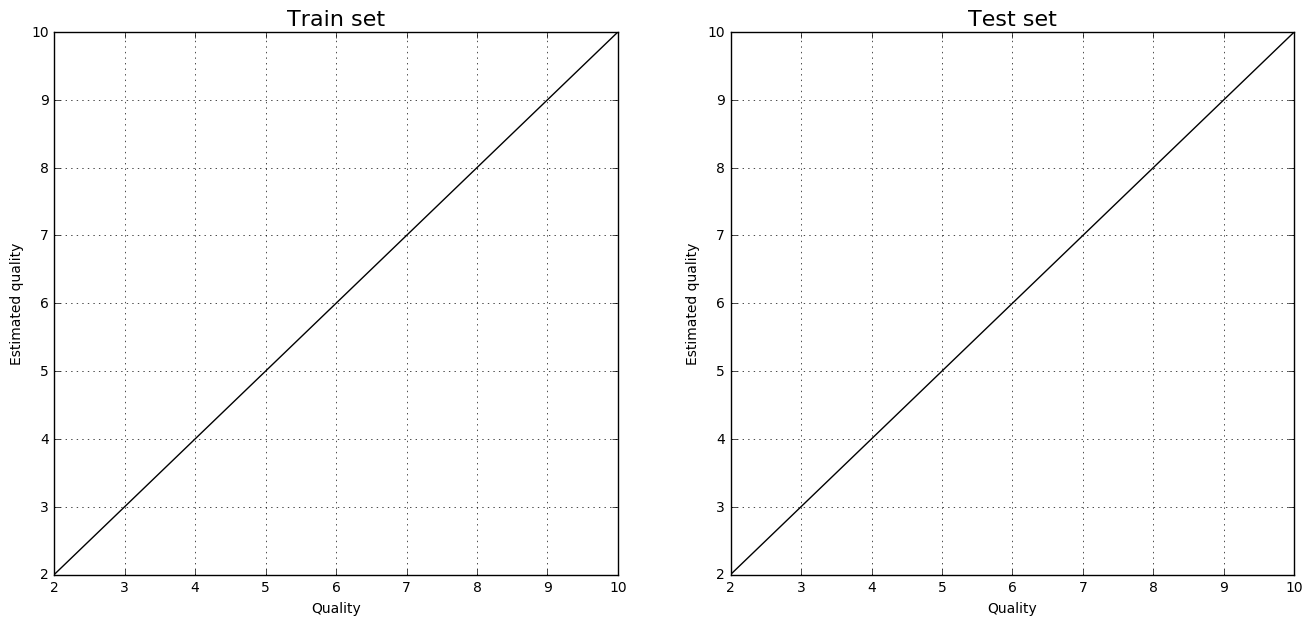

In [23]:
plt.figure(figsize(16,7))
plt.subplot(121)
pyplot.scatter(y_train, y_train_predicted, color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Train set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

plt.subplot(122)
pyplot.scatter(y_test, y_test_predicted, color="red", alpha=0.1)
pyplot.xlim(2,10)
pyplot.ylim(2,10)
plot(range(11), color='black')
grid()
pyplot.title('Test set', fontsize=16)
pyplot.xlabel('Quality')
pyplot.ylabel('Estimated quality')

# Neural Networks

In [8]:
nn = MLPRegressor()
nn.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [9]:
y_train_predicted = nn.predict(X_train)
y_test_predicted = nn.predict(X_test)    

In [10]:
mae_train = mean_absolute_error(y_train, y_train_predicted)
mae_test = mean_absolute_error(y_test, y_test_predicted)

In [11]:
mae_test

25329.712045650984

In [12]:
mae_train

25291.455182253976

In [13]:
rms_train = mean_squared_error(y_train, y_train_predicted)
rms_test = mean_squared_error(y_test, y_test_predicted)

In [14]:
rms_train

3794418132.0303774

In [15]:
rms_test

3955157621.5395036

## Professor Code

In [45]:
#Import xtrain from csv file
import pandas as pd
import numpy as np

In [46]:
columns = ['assessmentyear','bathroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','propertylandusetypeid','taxamount']
X = zillow_data[columns]
y = zillow_data['logerror']

In [47]:
from pybrain.datasets            import ClassificationDataSet
from pybrain.utilities           import percentError
from pybrain.tools.shortcuts     import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules   import SoftmaxLayer

In [48]:
ds = ClassificationDataSet(6, 1 , nb_classes=2)
for k in range(len(X)): 
    ds.addSample(X.iloc[k],y.iloc[k])

In [49]:
ds._convertToOneOfMany( )

IndexError: index -3 is out of bounds for axis 1 with size 2

In [32]:
fnn = buildNetwork( ds.indim, 3 , ds.outdim, outclass=SoftmaxLayer )

In [33]:
nn = BackpropTrainer( fnn, dataset=ds, momentum=0.1, verbose=True, weightdecay=0.01)

In [35]:
result = percentError( nn.testOnClassData(), ds['class'] )
result

0.0005988418398816689

In [36]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

ImportError: No module named 'keras'

In [44]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

dataset = zillow_data
# split into input (X) and output (Y) variables
X = X_train
Y = y_train
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2)
# calculate predictions
#predictions = model.predict(X)
# round predictions
#rounded = [round(x[0]) for x in predictions]
#print(rounded)

/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, kernel_initializer="uniform", activation="relu", input_dim=8)`
/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="uniform", activation="relu")`
/Users/sonalichaudhari/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform", activation="sigmoid")`


UnboundLocalError: local variable 'arrays' referenced before assignment

In [50]:
zillow_data.isnull().sum()

age                             0
assessmentyear                  0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
landtaxvaluedollarcnt           0
latitude                        0
logerror                        0
longitude                       0
lotsizesquarefeet               0
month                           0
parcelid                        0
propertycountylandusecode       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
structuretaxvaluedollarcnt      0
taxamount                       0
taxvaluedollarcnt               0
transactiondate                 0
year                            0
yearbuilt                       0
dtype: int64